#### Task 1.1: Data Understanding

Explore the incidents dataset using analytical tools and write a concise "data understanding" report that assesses data quality, the distribution of variables, and pairwise correlations.

Subtasks of Data Understanding:

- Data semantics for each feature not described above and the new ones defined by the team
- Distribution of the variables and statistics
- Assessing data quality (missing values, outliers, duplicated records, errors)
- Variables transformations
- Pairwise correlations and eventual elimination of redundant variables

Nice visualization and insights can be obtained by exploiting the latitude and longitude features ([example](https://plotly.com/python/getting-started/)).

For this task we followed the following check structure [#WIP]():
1. [] Type of data
2. [x] Type of attribute
3. [] Data Quality
4. [ ] Outliers detection and manipulation
5. [ ] Correlation analysis


#### Task 1.2: Data Preparation

Improve the quality of your data and prepare it by extracting new features interesting for describing the incidents. Some examples of indicators to be computed are:


# Indicators:

Are a useful tools to enhance out dataset and create new feature that can be used to further infer statistical information on the data, useful if we want to try clustering, K-means, classification... 

## Old indicators
---
- How many males are involved in incidents relative to the total number of males for the same city and in the same period?
- How many injured and killed people have been involved relative to the total injured and killed people in the same congressional district in a given period of time?
- Ratio of the number of killed people in the incidents relative to the number of participants in the incident
- Ratio of unharmed people in the incidents relative to the average of unharmed people in the same period
---

## New indicators
---
- How many males are involved in the incident w.r.t. the total number of males involved
in incidents for the same city and in the same period?
- How many injured and killed people have been involved w.r.t the total injured and killed people in the same congressional district in a given period of time?
- Ratio of the number of the killed people in the incident w.r.t. the number of participants in the incident
- Ratio of unharmed people in the incident w.r.t. the average of unharmed people involved in incidents for the same period
---

## Our indicators
---
#### Temporal analysis per years:
Is the number of incidents involving male or female increased or decreased during the years? Is there a trend? 

- Is the (ratio there are ) number of males or females or child and teen increased during the years?

- Deaths per days / incidents per day/month

#### Covid-19 effect (also for other datasets):
- How's changed the number of incidents from 2019 to 2020 
- How much growth of poverty from covid

#### Severity Ratio in Incidents for a State:
Calculate the ratio of killed and injured individuals to the total number of participants in incidents for each state. This gives an overview of incident severity per state.

#### Demographic Distribution of Injured and Killed Individuals:
Analyze the demographic distribution (age groups, gender) of injured and killed individuals in incidents within specific cities. This helps understand which demographics are more vulnerable. 

- eg. What gender and age group in each state is more vulnerable to incidents?

#### Geospatial Incident Severity Index:
Create an index considering the number of injured and killed individuals relative to the total number of incidents in a specific geographical area This can help identify high-risk areas.

#### Arrests and Unharmed Ratio:
Calculate the ratio of arrested participants to unharmed participants in incidents compared to the average ratio over a specific period. This can indicate law enforcement effectiveness or incident nature changes.

#### Gender Disparity in Incidents:
Calculate the ratio of males to females involved in incidents across different age groups or locations. This can highlight gender disparities in incidents.

---

Note that these examples are not mandatory, and teams can define their own indicators. Each indicator must be correlated with a description and, when necessary, its mathematical formulation. The extracted variables will be useful for the clustering analysis in the second project's task. Once the set of indicators is computed, the team should explore the new features for a statistical analysis, including distributions, outliers, visualizations, and correlations.

See the corresponding Notebook in [Task 1.2 - Data Preparation](Task1_Data_Preparation.ipynb).




# Task 1.1 - Data Understanding `incident.csv`

**Disclaimer!** : This part will be a series of insights of the dataset (errors, missing values, outliers, etc...) and a bunch of visualization to better understand the dataset. Some changes to the dataset will be made immediately to make the dataset more readable and easier to work with then we will work on the dataset in the **Data Cleaning** part.

We have to do some data understanding, so we're gonna explore the dataset. We can start with a simple analysis that establish the variable inside our dataset and visualize a bunch of their distibution, type, etc...

In [1]:
# This will take a while
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

import plotly.offline as py


# Set a seed for reproducibility
np.random.seed(42)


/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Dataset Structure

Let's breakdown the first, larger dataset `incidents.csv` by describing briefly the general structure:
- 28 Columns features: Some categorical like `date`, `state` etc... Others are numerical like `n_participants, n_males` despite the type must be still checked. 
- Textual features like `notes`, `incident_characteristics1` and `incident_characteristics2` will be firstly analyzed but, at first look, are not much useful when combined with other dataset as the information reported are fragmented/incorrect/ambiguous. 

Let's import all the three dataset, starting to analyze first the larger one:

In [2]:
# Import the datasets

# Gun incidents data
df_incidents = pd.read_csv('../source/ds/incidents.csv')

# Poverty by state and year
df_poverty = pd.read_csv('../source/ds/povertyByStateYear.csv')

# Year-state-district-house
df_ysdh = pd.read_csv('../source/ds/year_state_district_house.csv')


# Visualize data table
df_incidents.head(20)


/tmp/ipykernel_97073/2572660480.py:4: DtypeWarning:

Columns (15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.



,date,state,city_or_county,address,latitude,longitude,congressional_district,state_house_district,state_senate_district,participant_age1,...,n_males,n_females,n_killed,n_injured,n_arrested,n_unharmed,n_participants,notes,incident_characteristics1,incident_characteristics2
0,2015-05-02,Indiana,Indianapolis,Lafayette Road and Pike Plaza,39.8322,-86.2492,7.0,94.0,33.0,19.0,...,1.0,0.0,0,1,0.0,0.0,1.0,Teen wounded while walking - Security guard at...,Shot - Wounded/Injured,NaN
1,2017-04-03,Pennsylvania,Kane,5647 US 6,41.6645,-78.7856,5.0,NaN,NaN,62.0,...,1.0,0.0,1,0,0.0,0.0,1.0,shot self after accident,"Shot - Dead (murder, accidental, suicide)",Suicide^
2,2016-11-05,Michigan,Detroit,6200 Block of East McNichols Road,42.4190,-83.0393,14.0,4.0,2.0,NaN,...,NaN,NaN,0,1,0.0,1.0,2.0,1 inj.,Shot - Wounded/Injured,NaN
3,2016-10-15,District of Columbia,Washington,"1000 block of Bladensburg Road, NE",38.9030,-76.9820,1.0,NaN,NaN,NaN,...,1.0,0.0,0,1,0.0,0.0,2.0,NaN,Shot - Wounded/Injured,NaN
4,2030-06-14,Pennsylvania,Pittsburgh,California and Marshall Avenues,40.4621,-80.0308,14.0,NaN,NaN,NaN,...,1.0,0.0,0,1,0.0,1.0,2.0,NaN,Shot - Wounded/Injured,"Drive-by (car to street, car to car)"
5,2014-01-18,North Carolina,Wayne County,4700 block of U.S. Highway 70 East,35.1847,-77.9527,13.0,4.0,7.0,65.0,...,1.0,0.0,0,1,0.0,0.0,1.0,NaN,Shot - Wounded/Injured,Home Invasion
6,2018-01-25,Louisiana,Zachary,18733 Samuels Rd,30.6069,-91.2270,6.0,63.0,15.0,30.0,...,5.0,0.0,2,1,2.0,0.0,5.0,Good Samaritan shot aggressors - was arrested ...,Shot - Wounded/Injured,"Shot - Dead (murder, accidental, suicide)"
7,2016-03-16,Connecticut,New Haven,560 Ella T Grasso Boulevard,41.2945,-72.9457,3.0,116.0,10.0,NaN,...,1.0,0.0,0,0,1.0,0.0,1.0,"student hid Ruger 357 gun in coat, no shots fired",Institution/Group/Business,Non-Shooting Incident
8,2016-08-01,Virginia,Stafford,Cool Springs Road and North Kings Highway,38.3008,-77.4469,1.0,28.0,28.0,65.0,...,1.0,0.0,1,0,0.0,0.0,1.0,"car crash, suspect holding handgun, officers s...","Shot - Dead (murder, accidental, suicide)",Officer Involved Incident
9,2015-03-22,Oklahoma,Tulsa,12500 block of East 52nd Street,36.1060,-96.0764,1.0,66.0,37.0,20.0,...,0.0,1.0,0,1,0.0,0.0,1.0,Super 8 Motel,Shot - Wounded/Injured,Accidental Shooting


At first look there are values whose the type is not matching or is ambiguous, so we delve deeper into this aspect:

In [3]:
print("--"*50)
df_incidents.info()

----------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239677 entries, 0 to 239676
Data columns (total 28 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   date                       239677 non-null  object 
 1   state                      239677 non-null  object 
 2   city_or_county             239677 non-null  object 
 3   address                    223180 non-null  object 
 4   latitude                   231754 non-null  float64
 5   longitude                  231754 non-null  float64
 6   congressional_district     227733 non-null  float64
 7   state_house_district       200905 non-null  float64
 8   state_senate_district      207342 non-null  float64
 9   participant_age1           147379 non-null  float64
 10  participant_age_group1     197558 non-null  object 
 11  participant_gender1        203315 non-null

## 1. Data Quality
In this section we evaluate the following:
- **Syntactic accuracy**: if the domain value of the attributes is respected
- **Semantic accuracy**: correct attribute value
- **Completeness**: if the samples cover the all the possible value of the attribute
- **Unbalanced data**: understand if all the record represents all the possible scenarios the dataset want describe, equally
- **Timeliness**: understand if data are coherent respect to the timeframe considered

It's necessary to highlight also the importance of __eliminate duplicate data, plot the histogram visualization for frequency distribution and measure the central tendency (_AAD,MAD_)__. 


In [4]:
df_incidents.describe()

,latitude,longitude,congressional_district,state_house_district,state_senate_district,participant_age1,n_males,n_females,n_killed,n_injured,n_arrested,n_unharmed,n_participants
count,231754.000000,231754.000000,227733.000000,200905.000000,207342.00000,147379.000000,203315.000000,203315.000000,239677.000000,239677.000000,212051.000000,212051.000000,239677.000000
mean,37.546598,-89.338348,8.001265,55.447132,20.47711,30.295707,1.520252,0.212340,0.252290,0.494007,0.468439,0.494169,1.636895
std,5.130763,14.359546,8.480835,42.048117,14.20456,13.363592,0.996767,0.490888,0.521779,0.729952,0.851035,0.925566,1.252514
min,19.111400,-171.429000,0.000000,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.903400,-94.158725,2.000000,21.000000,9.00000,21.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,38.570600,-86.249600,5.000000,47.000000,19.00000,27.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,41.437375,-80.048625,10.000000,84.000000,30.00000,37.000000,2.000000,0.000000,0.000000,1.000000,1.000000,1.000000,2.000000
max,71.336800,97.433100,53.000000,901.000000,94.00000,311.000000,61.000000,23.000000,50.000000,53.000000,63.000000,20.000000,103.000000


The `describe` return basic statistics for numerical attributes: at first look, are missing multiple attributes because some of the expected numerical attributes are of type `object`. Also, most of the attributes shown are `float64` despite the expected numerical range is an `int64`. 

Aside from that, still without much pre-processing we can understand that:
- `congressional_district`: the min and max value return a correct domain for the attribute as the state with most congressional district is the state of California.
- `state_house_district`: the min and max value shows an _incorrect_ domain as the state with most state house district is the New Hampshire with 400 district, not 901.
- `state_senate_district`: the min and max value shows an _incorrect_ domain as the state with most state senate district is the Minnesota with 67 district, not 94.
- `partecipant_age1`:  the max age shows the presence of noise data with age over 300.


## Preliminary data conversions

All of the following attributes are `object` or `float64` so we convert them to `int64`:

- N.B. : Not all data conversion are done here because we will work during the data understanding phase and make some modification along the way 

In [5]:
# --- Numerical conversions

# - avg_age_participants, min_age_participants, max_age_participants, n_participant_child, n_participant_teen, n_participant_adult: are all object time, convert them to int
columns_to_convert = [
    'min_age_participants',
    'avg_age_participants',
    'max_age_participants',
    'n_participants_child',
    'n_participants_teen',
    'n_participants_adult'
]

district_to_int = ['state_house_district', 'state_senate_district', 'congressional_district']

# Convert non-numeric values to NaN
df_incidents[columns_to_convert] = df_incidents[columns_to_convert].apply(pd.to_numeric, errors='coerce')

for column in district_to_int:
    df_incidents[column] = df_incidents[column].fillna(0).astype(int)
    
# Fill NaN values with 0
df_incidents[columns_to_convert] = df_incidents[columns_to_convert].fillna(0).astype(int)

# Convert date to datetime
df_incidents['date'] = pd.to_datetime(df_incidents['date'])

# --- String & Category conversions

# Convert state to string with convert_dtypes
df_incidents['state'] = df_incidents['state'].convert_dtypes(str)

# Convert city_or_county to string
df_incidents['city_or_county'] = df_incidents['city_or_county'].astype('string')

# Convert address to string
df_incidents['address'] = df_incidents['address'].astype('string')

# Convert participant_age_group1 to category
df_incidents['participant_age_group1'] = df_incidents['participant_age_group1'].astype('category')

# Convert participant_gender1 to category
df_incidents['participant_gender1'] = df_incidents['participant_gender1'].astype('category')

df_incidents.dtypes
df_incidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239677 entries, 0 to 239676
Data columns (total 28 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   date                       239677 non-null  datetime64[ns]
 1   state                      239677 non-null  string        
 2   city_or_county             239677 non-null  string        
 3   address                    223180 non-null  string        
 4   latitude                   231754 non-null  float64       
 5   longitude                  231754 non-null  float64       
 6   congressional_district     239677 non-null  int64         
 7   state_house_district       239677 non-null  int64         
 8   state_senate_district      239677 non-null  int64         
 9   participant_age1           147379 non-null  float64       
 10  participant_age_group1     197558 non-null  category      
 11  participant_gender1        203315 non-null  category

## Describe after data conversion

From here we can observe a lot of errors inside oue data that will be fixed during the next phases

In [6]:
df_incidents.describe()

,date,latitude,longitude,congressional_district,state_house_district,state_senate_district,participant_age1,min_age_participants,avg_age_participants,max_age_participants,n_participants_child,n_participants_teen,n_participants_adult,n_males,n_females,n_killed,n_injured,n_arrested,n_unharmed,n_participants
count,239677,231754.000000,231754.000000,239677.000000,239677.000000,239677.000000,147379.000000,2.396770e+05,2.396770e+05,2.396770e+05,239677.000000,239677.000000,239677.000000,203315.000000,203315.000000,239677.000000,239677.000000,212051.000000,212051.000000,239677.000000
mean,2017-08-21 02:54:15.871860480,37.546598,-89.338348,7.602532,46.477576,17.714528,30.295707,3.767312e+06,1.624494e+04,1.242133e+04,13.289519,6.975338,15.263233,1.520252,0.212340,0.252290,0.494007,0.468439,0.494169,1.636895
min,2013-01-01 00:00:00,19.111400,-171.429000,0.000000,0.000000,0.000000,0.000000,-1.000000e+03,-1.000000e+03,-1.000000e+03,-977.000000,-947.000000,-991.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015-07-11 00:00:00,33.903400,-94.158725,2.000000,9.000000,5.000000,21.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2016-08-25 00:00:00,38.570600,-86.249600,5.000000,35.000000,15.000000,27.000000,1.900000e+01,2.100000e+01,2.100000e+01,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,2017-08-09 00:00:00,41.437375,-80.048625,10.000000,77.000000,29.000000,37.000000,2.900000e+01,3.100000e+01,3.300000e+01,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,1.000000,1.000000,1.000000,2.000000
max,2030-11-28 00:00:00,71.336800,97.433100,53.000000,901.000000,94.000000,311.000000,9.000000e+11,8.719163e+08,8.300000e+06,886365.000000,762487.000000,827900.000000,61.000000,23.000000,50.000000,53.000000,63.000000,20.000000,103.000000
std,NaN,5.130763,14.359546,8.448175,43.576547,14.949467,13.363592,1.838355e+09,1.792441e+06,8.774425e+04,2991.328168,2019.152261,2935.067922,0.996767,0.490888,0.521779,0.729952,0.851035,0.925566,1.252514


## Type and Range data considerations
The type conversion shows all the expected numerical column, highlighting that:
- `min_age_partecipants`: shows noise data with age -1000 and max age over 8 billion. Similar behaviour is inevitably also found for attributes `avg_age_partecipants, max_age_partecipants`
- `n_partecipants_child`,`n_partecipants_teen` and `n_participants_adult`: min value cannot be negative and max value is over the (_un-processed_) dataset size of 239677 records.
- Also we can observe that a lot of data are in float format, so we convert them to int64.

Other consistency checks are performed after the dataset has been manipulated from noise and outlier records.

### Let's understand what is the semantic of the text attributes and their frequencies:

Redundant with notes1, and notes2 so we decide to drop it

In [7]:
# Top notes text motivations, this will be dropped!
df_incidents['notes'].value_counts().head(20)

notes
man shot                            501
1 inj.                              485
1 killed.                           468
Male shot wounded                   396
shot in leg                         349
1mv                                 332
1mvk                                266
shot multiple times                 256
Male shot killed                    251
ar                                  210
9mm                                 187
380 caliber                         172
1 male shot - wounded               172
Car-jacking.                        160
1 inj                               152
1 inj. This story is developing.    151
1 male victim shot - killed         139
1 killed                            132
shots fired                         128
shot and wounded                    117
Name: count, dtype: int64

## Textual attributes

We decide to keep the incident_characteristics1 because we decided to keep this information for the clustering phase. We will see later how to handle this information.

The `notes` attribute contains arbitrary values, difficult to extract and categorize, alongside the number of non-NA records for this attribute is very low so it result not useful for the goal of the analysis. 


The attribute `incident_characteristics1` describe the specificity of the incidents, sometimes relative to the type of shot (_dead, injured, wounded, accidental, suicide, etc_) while the attribute `incident_characteristics2` describe the specificity of the context in which the incident happened or has been recorded. 

We decide to drop Address attribute later because isn't enough informative, and we have more information about position and more...

In [8]:
#Top incident_characteristics1 text motivations, we can make a category with the first 4 and the rest is other
df_incidents['incident_characteristics1'].value_counts().head(20)

# take first four incident_characteristics1
# rename all the rest to other
keepers = df_incidents['incident_characteristics1'].value_counts().head(4).index
df_incidents.loc[~df_incidents['incident_characteristics1'].isin(keepers), 'incident_characteristics1'] = 'other'

# To category
df_incidents['incident_characteristics1'] = df_incidents['incident_characteristics1'].astype('category')

In [9]:
#Top incident_characteristics2 text motivations, this will be discarded due to the high amiynt of NaN values and the low amount of information
df_incidents['incident_characteristics2'].value_counts().head(20)


incident_characteristics2
Officer Involved Incident                                       13881
Drive-by (car to street, car to car)                            11873
Drug involvement                                                11717
Home Invasion                                                    8664
Shot - Dead (murder, accidental, suicide)                        8345
Armed robbery with injury/death and/or evidence of DGU found     6438
Possession (gun(s) found during commission of other crimes)      6084
ATF/LE Confiscation/Raid/Arrest                                  5916
Accidental Shooting                                              5723
Domestic Violence                                                5690
Institution/Group/Business                                       5315
Suicide^                                                         4680
Brandishing/flourishing/open carry/lost/found                    4181
Gang involvement                                                

Another text attribute is `participant_age_group1`, that we transformed in a categorical attribute, why? Reconstructing missing values


In [10]:
df_incidents['participant_age_group1'].value_counts().head()

participant_age_group1
Adult 18+     181324
Teen 12-17     13659
Child 0-11      2575
Name: count, dtype: int64

This attribute can be useful to reconstruct the missing values of `n_participants_child`, `n_participants_teen` and `n_participants_adult` so we decide to not drop it. 

Let's also consider the `date` attribute, defining the range of years that the dataset refer:

### Gender variable problem

We saw a single record having a problem with the tag, we discard it

In [11]:

df_incidents.groupby('participant_gender1').count()

/tmp/ipykernel_97073/730324695.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,date,state,city_or_county,address,latitude,longitude,congressional_district,state_house_district,state_senate_district,participant_age1,...,n_males,n_females,n_killed,n_injured,n_arrested,n_unharmed,n_participants,notes,incident_characteristics1,incident_characteristics2
participant_gender1,,,,,,,,,,,,,,,,,,,,,
Female,25369,25369,25369,23346,24449,24449,25369,25369,25369,19308,...,25369,25369,25369,25369,25304,25304,25369,17480,25369,17508
Male,177945,177945,177945,165555,171698,171698,177945,177945,177945,126859,...,177945,177945,177945,177945,176453,176453,177945,119034,177945,108227
"Male, female",1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


## Incident per year : an example of Umblanced Data

First we have some problems with years: there are 2028,29,30 we need to fix that.

Next, for each year we have a number of records of incidents, we could drop maybe the year 2013 later because it has very few, we need to understand why 2018, 2019, 2020 have so few examples...

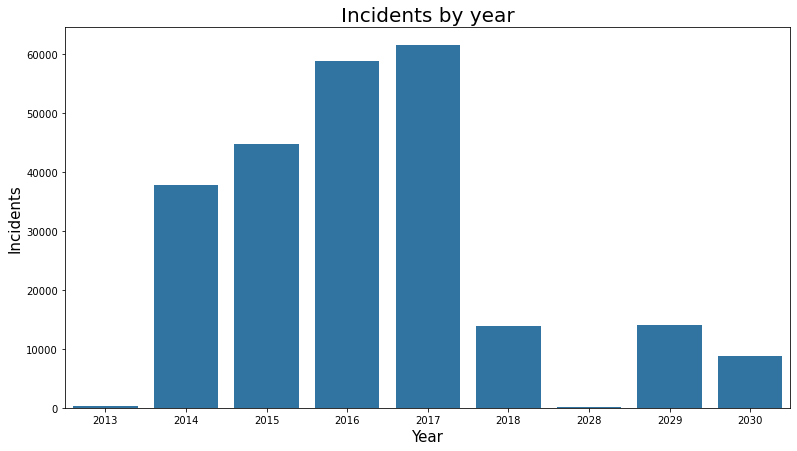

In [12]:
import seaborn as sns

# order by date
df_incidents.sort_values(by=['date'], inplace=True)

# group by year
df_incidents.groupby(df_incidents['date'].astype(str).str[:4]).size()

# plot distribution of incidents by year
plt.figure(figsize=(13,7))
sns.countplot(x=df_incidents['date'].astype(str).str[:4], data=df_incidents)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Incidents', fontsize=15)
plt.title('Incidents by year', fontsize=20)
plt.show()



# Fixing years problem

We further investigated this problem and decide to change names of the years in the dataset

In [13]:
# Exploring dataset errors, there are various type such as: cities located in wrong states, logitude and latiude 
# wrong years in incident dataframe (incidents in 2029 and 2030, maybe they were 2019-2020 since data is until 2020)

# Changing dates in df_incidents


df_incidents['date'] = df_incidents['date'].astype(str).str.replace('2028', '2018')
df_incidents['date'] = df_incidents['date'].astype(str).str.replace('2029', '2019')
df_incidents['date'] = df_incidents['date'].astype(str).str.replace('2030', '2020')

# Show years in date column unique

df_incidents['date'].astype(str).str[:4].unique()

array(['2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020'],
      dtype=object)

### Another insight about the years

We could drop 2013 since it contains very few examples: around 200

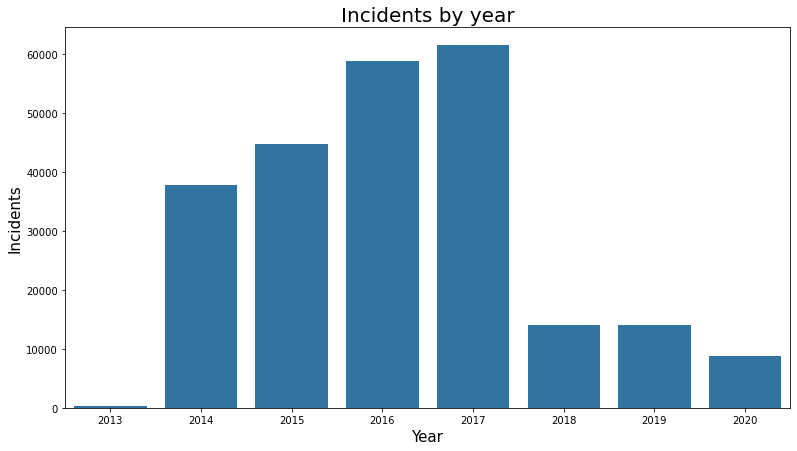

In [14]:
import seaborn as sns

# order by date
df_incidents.sort_values(by=['date'], inplace=True)

# group by year
df_incidents.groupby(df_incidents['date'].astype(str).str[:4]).size()

# plot distribution of incidents by year
plt.figure(figsize=(13,7))
sns.countplot(x=df_incidents['date'].astype(str).str[:4], data=df_incidents)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Incidents', fontsize=15)
plt.title('Incidents by year', fontsize=20)
plt.show()


## Let's see the first and last day of recorded incident

In [15]:
first_day = {}
last_day = {}

# order df_incidents by date
df_incidents.sort_values(by=['date'], inplace=True)

for year in df_incidents['date'].astype(str).str[:4].unique():
    # take first day year is key, value is first day
    first_day[year] = df_incidents[df_incidents['date'].astype(str).str[:4] == year]['date'].min()
    # take last day year is key, value is last day
    last_day[year] = df_incidents[df_incidents['date'].astype(str).str[:4] == year]['date'].max()
    
for first, last in zip(first_day.items(), last_day.items()):
    print(f'Year {first[0]}: {first[1]} - {last[1]}')
    


Year 2013: 2013-01-01 - 2013-12-31
Year 2014: 2014-01-01 - 2014-12-31
Year 2015: 2015-01-01 - 2015-12-31
Year 2016: 2016-01-01 - 2016-12-31
Year 2017: 2017-01-01 - 2017-12-31
Year 2018: 2018-01-01 - 2018-12-31
Year 2019: 2019-01-01 - 2019-12-31
Year 2020: 2020-01-01 - 2020-11-28


# Discussion about 2018 data and following years

1. As we can see from the plot below in 2018 the dataset contains registered incidents only for the first 3 months of the year and some in December, so we cannot assume anything on the rest of 2018.
2.  Strangely in 2019 and 2020 we have incidents recorder every months but the number is 4 times less than 2017, we could have an explaination for 2020: **the covid-19 pandemic**.
3. For 2019 instead we don't any justification for the moment, just less data collected.

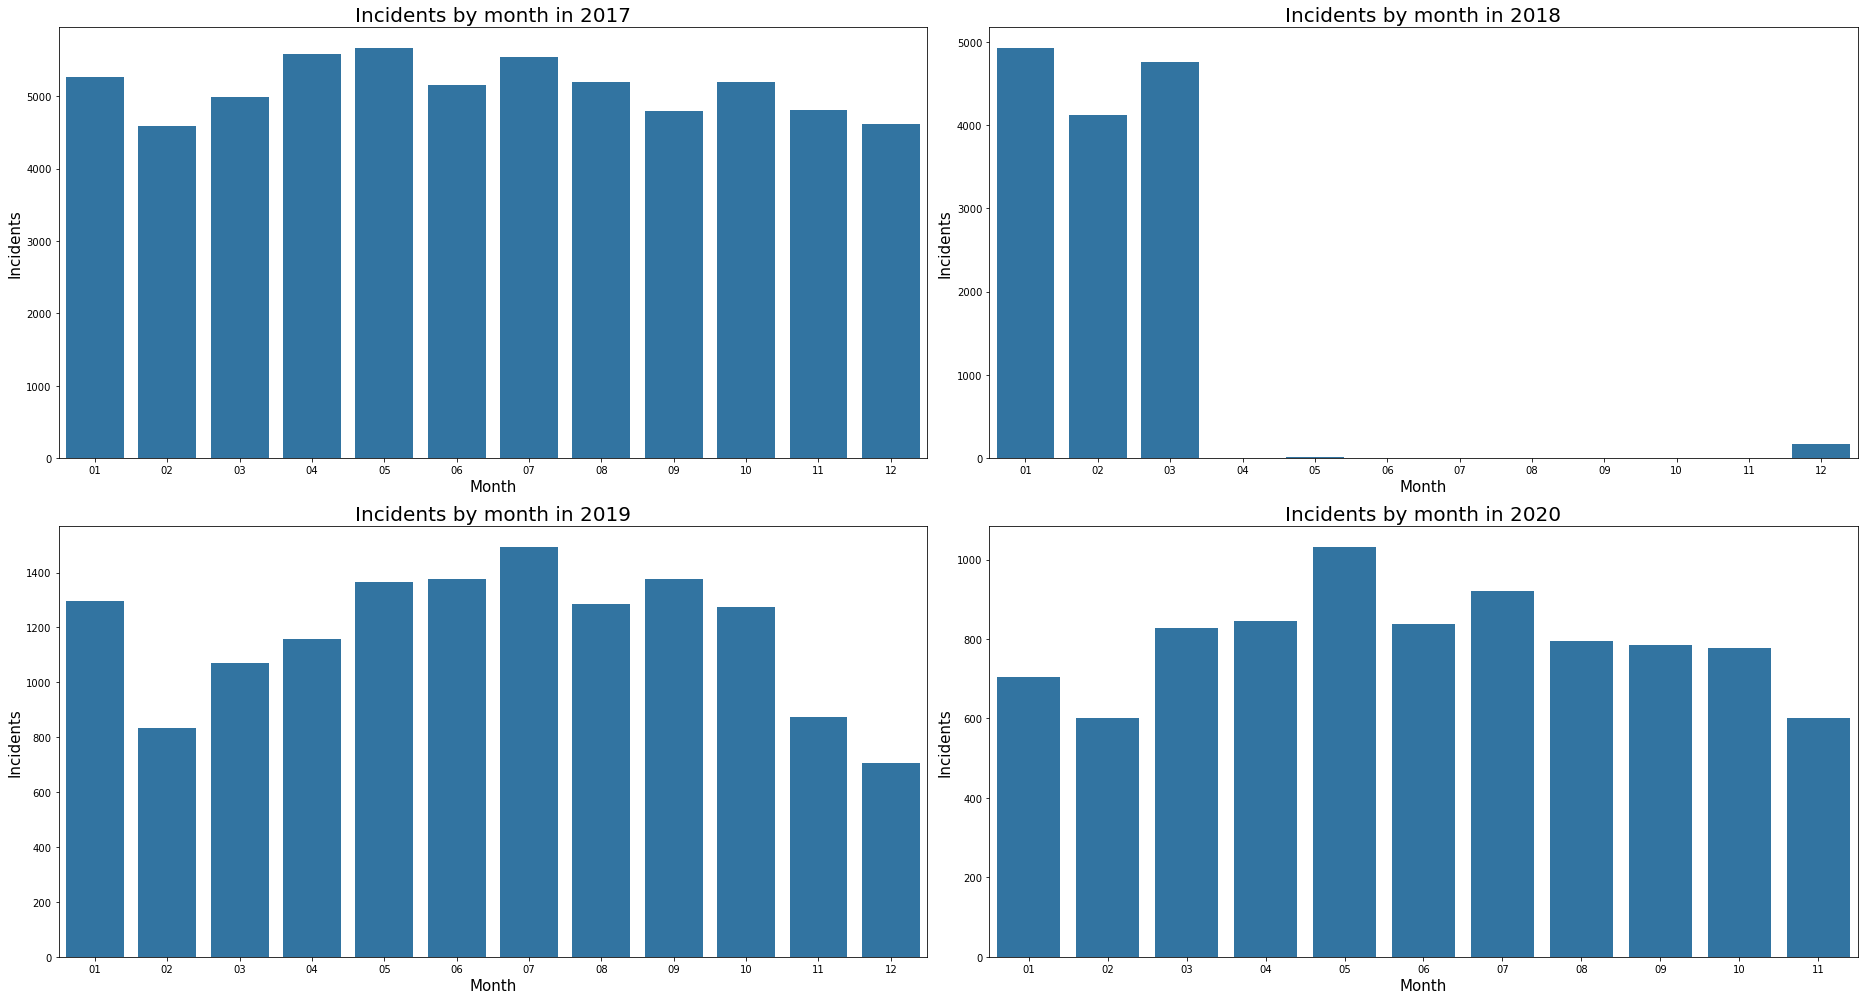

In [16]:
fig, axs = plt.subplots(2, 2, figsize=(26,14))  # 2 rows, 2 columns
axs = axs.ravel()  # flatten the 2D array to 1D

for i, year in enumerate(['2017','2018', '2019', '2020']):
    sns.countplot(x=df_incidents[df_incidents['date'].astype(str).str[:4] == year]['date'].astype(str).str[5:7], data=df_incidents, ax=axs[i])
    axs[i].set_xlabel('Month', fontsize=15)
    axs[i].set_ylabel('Incidents', fontsize=15)
    axs[i].set_title(f'Incidents by month in {year}', fontsize=20)

plt.tight_layout()
plt.show()

## Adding Year column


After we analyzed the other two dataset we decided to add a year column to this dataset


### Also drop 2013

Contains very few examples: 253

In [17]:
# drop all incidents in 2013

print(len(df_incidents[df_incidents['date'].astype(str).str[:4] == '2013']))

df_incidents.drop(df_incidents[df_incidents['date'].astype(str).str[:4] == '2013'].index, inplace=True)

print(len(df_incidents))

# Add year column

df_incidents['year'] = df_incidents['date'].astype(str).str[:4]
# set type of year to int
df_incidents['year'] = df_incidents['year'].astype(int)

253
239424


## Partitipants per state visualization

The following plot visualizes the distribution of total participants in incidents across different states. This provide insights into the geographic distribution of incidents and help identify states with higher or lower levels of participation, used later in the analysis.

### Observation: 

We can see that Texas, California and Illinois are dangerous states

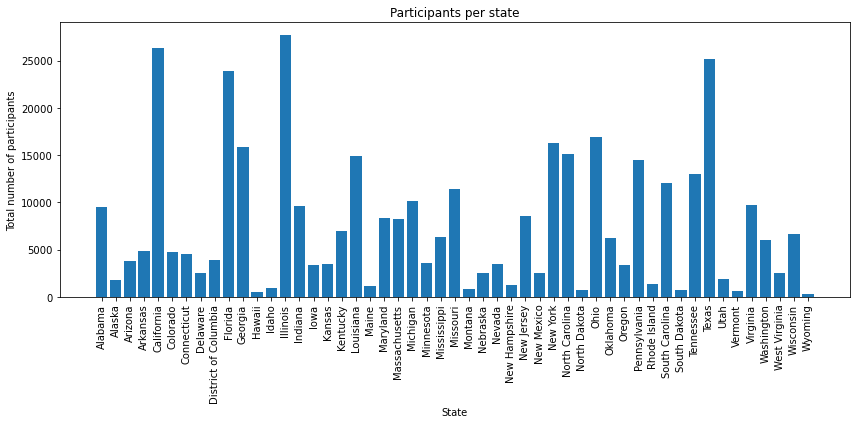

In [18]:
# group by state and compute number pf partecipants (per state)
participants_per_state = df_incidents.groupby('state')['n_participants'].sum().reset_index()

# Histogram
plt.figure(figsize=(12, 6))
plt.bar(participants_per_state['state'], participants_per_state['n_participants'])
plt.xlabel('State')
plt.ylabel('Total number of participants')
plt.title('Participants per state')
plt.xticks(rotation=90) 
plt.tight_layout()
plt.show()



# 2. Data Cleaning 
  
- Drop unecessary columns
- Remove Duplicates
- select attributes (to identify the relevant __after looking to correlation matrix__)
- reduce the data dimension (refer to number of attributes, allows categorization of other attributes, __(todo in preparation after cleaning)__
dropping the useless) 
    - look at correlation matrix
    - feature creation by __filter methods, wrapper, embedded methods__. It may regard the creation of *systematic indicators*, so are domain-specific.
- select records --> sampling (random sampling)
    - check what are the composition (e.g. 80% adult, 10% teen, 10% kids) __(todo in preparation after cleaning)__
- treat missing values
    - mean, median, mode to reconstruct
    - classification/regression (?)
- discretization
    - supervised discretization based on entropy (_explain why we do not use discretization)
- normalization (?)
- treat outliers (_in data cleaning_)
- Remove NaNs
    - Some records with NaNs can be reconstructed: reconstruct the null value of `partecipant_age1` starting from the value of `participant_age_group1` that can assume 3 string value "Adult 18+", "Teen 12-17","Child 0-11". (Beforehand we already dropped the NaN records for all attributes except `partecipant_age1`). To reconstruct the exact value, take the `partecipant_age_group1`  and as a value take the mode of all the records in the same group.
- PCA

For the data cleaning phase, we set a threshold of 50% of NA values for each column and remove the redundand records, if any:

## Cleaning pipeline

0. Drop unecessary columns
1. Remove Nans and duplicates
2. Adjust the right numeric type 
3. Outliers detection and removal.

--- 

In [21]:
df_incidents.head()

,date,state,city_or_county,latitude,longitude,congressional_district,participant_age1,participant_age_group1,participant_gender1,min_age_participants,...,n_participants_adult,n_males,n_females,n_killed,n_injured,n_arrested,n_unharmed,n_participants,incident_characteristics1,year
172652,2014-01-01,Arizona,Rio Rico,31.4674,-110.9740,3,NaN,NaN,NaN,0,...,0,NaN,NaN,0,0,NaN,NaN,0.0,Shots Fired - No Injuries,2014
58671,2014-01-01,Florida,Fort Myers,26.6336,-81.8601,19,NaN,NaN,NaN,0,...,0,NaN,NaN,0,0,0.0,2.0,2.0,Shots Fired - No Injuries,2014
178566,2014-01-01,New Jersey,Gloucester Township,39.8258,-75.0659,1,NaN,NaN,NaN,0,...,0,NaN,NaN,0,0,0.0,3.0,3.0,other,2014
238122,2014-01-01,District of Columbia,Washington,38.8807,-76.9293,1,NaN,NaN,NaN,0,...,0,NaN,NaN,0,0,NaN,NaN,0.0,Shot - Wounded/Injured,2014
218445,2014-01-01,Arkansas,Pine Bluff,34.2291,-91.9779,4,26.0,Adult 18+,Male,26,...,2,2.0,0.0,0,1,0.0,1.0,2.0,Shot - Wounded/Injured,2014


### Drop columns

We drop following columns because they are not useful for our analysis given a preliminary discussion did above.

In [20]:
df_incidents.drop(columns=['address','state_house_district','state_senate_district', 'notes', 'incident_characteristics2'], inplace=True) 


### Remove Nans and duplicates

In [22]:
# Remove NaNs

df_incidents.isna().sum()

#   Let's get the % of nans with respect to the total number of records, if is > 50% we drop the column

for col in df_incidents.columns:
    pct_missing = np.mean(df_incidents[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

    # drop if more than 50% of the data is missing
    if pct_missing > 0.5:
        df_incidents.drop(col, axis=1, inplace=True)

# Drop duplicates
df_incidents_nodup = df_incidents.drop_duplicates()

date - 0%
state - 0%
city_or_county - 0%
latitude - 3%
longitude - 3%
congressional_district - 0%
participant_age1 - 39%
participant_age_group1 - 18%
participant_gender1 - 15%
min_age_participants - 0%
avg_age_participants - 0%
max_age_participants - 0%
n_participants_child - 0%
n_participants_teen - 0%
n_participants_adult - 0%
n_males - 15%
n_females - 15%
n_killed - 0%
n_injured - 0%
n_arrested - 12%
n_unharmed - 12%
n_participants - 0%
incident_characteristics1 - 0%
year - 0%


As shown, no column have more than 50% of null values so among the columns we have selectd, none of them is actually dropped. It's important to highlight that the attribute with the most value missing is `partecipant_age1` so we will see later if this value can be reconstructed/substitute by exploiting other attributes about age of partecipants. For the moment, let's evaluate distribution and standard deviation:

Let's drop the records with NA value, excluding `partecipant_age1`:

In [23]:
columns_to_exclude = ['participant_age1']

df_incidents_nodup_cp = df_incidents_nodup.copy()

# Create a new DataFrame with NaNs removed for all columns except 'participant_age1'
num_records_before = len(df_incidents_nodup_cp)

df_incidents_nona = df_incidents_nodup_cp.dropna(subset=[col for col in df_incidents_nodup_cp.columns if col not in columns_to_exclude])

num_records_after = len(df_incidents_nona)

print(f'Records with NaNs removed: {num_records_after} ({round((num_records_after/num_records_before)*100, 2)}%)')

Records with NaNs removed: 184717 (77.38%)


## Reconstructing missing values in `partecipant_age1` and transforming in categorical `participant_age_group1`

We can reconstruct the missing values of `partecipant_age1` by exploiting the `participant_age_group1` attribute. We can assume that the age of the partecipants in the same group is the same, so we can take the mode of the age of the partecipants in the same group and substitute the missing value with the mode.

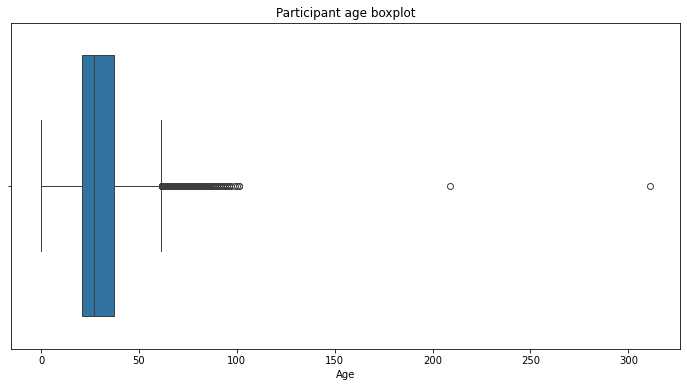

In [24]:
# Plot boxplto of participant_age1
plt.figure(figsize=(12, 6))
sns.boxplot(x=df_incidents_nodup['participant_age1'])
plt.xlabel('Age')
plt.title('Participant age boxplot')
plt.show()


In [25]:
# Create a copy of the DataFrame to avoid modifying the original
df_incidents_copy = df_incidents_nona.copy()


# Create a dictionary to store the mode values for each 'participant_age_group1'
mode_dict = df_incidents_copy.groupby('participant_age_group1')['participant_age1'].apply(lambda x: x.mode().values[0]).to_dict()

# transform participant_age_group1 in a categorical
df_incidents_copy['participant_age_group1'] = df_incidents_copy['participant_age_group1'].astype('category')
# Number of people involved by cateogry
df_incidents_copy['participant_age_group1'].value_counts()

# Define a function to fill missing values in 'participant_age1' based on 'participant_age_group1'
def fill_age_with_mode(row):
    if pd.isna(row['participant_age1']):
        return mode_dict.get(row['participant_age_group1'], row['participant_age1'])
    return row['participant_age1']

# Apply the function to create a new column 'filled_age1' with updated values
df_incidents_copy['participant_age1_recon'] = df_incidents_copy.apply(fill_age_with_mode, axis=1)

# substitute participant_age1 with participant_age1_recon
df_incidents_copy['participant_age1'] = df_incidents_copy['participant_age1_recon']
# drop participant_age1
df_incidents_copy.drop(['participant_age1_recon'], axis=1, inplace=True)



/tmp/ipykernel_97073/591181433.py:6: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



### After reconstruction distribution

We can see that the distribution is pretty much the same and we just have two outliers that will remove later that do not affect the distribution. So we can reconsturct the missing values of `partecipant_age1` and drop the `participant_age_group1` attribute.

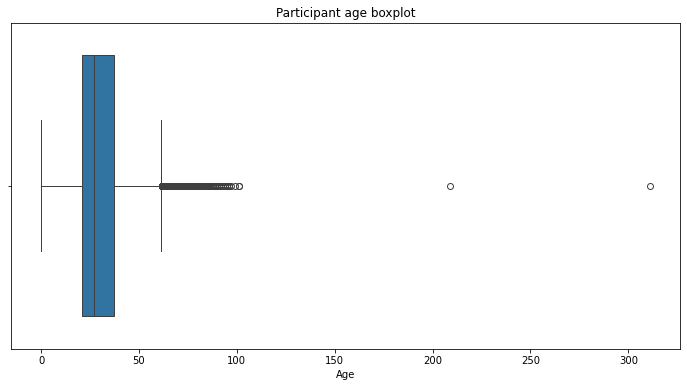

In [26]:
# Plot boxplto of participant_age1
plt.figure(figsize=(12, 6))
sns.boxplot(x=df_incidents_nona['participant_age1'])
plt.xlabel('Age')
plt.title('Participant age boxplot')
plt.show()

### After dropping all the Nans

In [27]:
#   Let's get the % of nans with respect to the total number of records after cleaning

for col in df_incidents_copy.columns:
    pct_missing = np.mean(df_incidents_copy[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

date - 0%
state - 0%
city_or_county - 0%
latitude - 0%
longitude - 0%
congressional_district - 0%
participant_age1 - 0%
participant_age_group1 - 0%
participant_gender1 - 0%
min_age_participants - 0%
avg_age_participants - 0%
max_age_participants - 0%
n_participants_child - 0%
n_participants_teen - 0%
n_participants_adult - 0%
n_males - 0%
n_females - 0%
n_killed - 0%
n_injured - 0%
n_arrested - 0%
n_unharmed - 0%
n_participants - 0%
incident_characteristics1 - 0%
year - 0%


### Adjust the right numeric and string type

In [28]:
for col in df_incidents_copy.columns:
    print(col, df_incidents_copy.dtypes[col])

date object
state string
city_or_county string
latitude float64
longitude float64
congressional_district int64
participant_age1 float64
participant_age_group1 category
participant_gender1 category
min_age_participants int64
avg_age_participants int64
max_age_participants int64
n_participants_child int64
n_participants_teen int64
n_participants_adult int64
n_males float64
n_females float64
n_killed int64
n_injured int64
n_arrested float64
n_unharmed float64
n_participants float64
incident_characteristics1 category
year int64


As we can see all numerical values needs to be converted to `int64` type, only latitude and longitude are float type.
Also date and other attributes are still `object` type so we need to convert them to `datetime64` and string type respectively.

In [29]:
# Convert all other numerical columns to int but not latitude and longitude

columns_to_convert = [
    'n_killed',
    'n_injured',
    'n_males',
    'n_females',
    'n_participants',
    'n_unharmed',
    'n_arrested',
]

for col in df_incidents_copy.columns:
    if col in [columns_to_convert]:
        # if type is float
        if df_incidents_copy.dtypes[col] == 'float64':
            df_incidents_copy[col] = df_incidents_copy[col].astype(int)


## 4. Outlier detection and removal

Here we will remove wrong values and some outliers from our data to make it statistically useful for our further analysis. We will use the following methods:

- **IQR**: to remove outliers from numerical attributes (to be decided)
- **Domain knowledge**: to remove wrong values from numerical attributes 

### Exploiting domain knowledge for numerical ranges

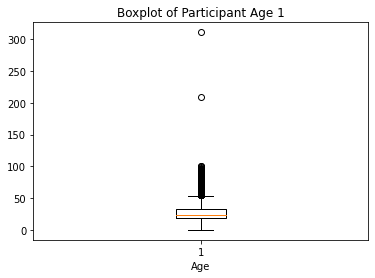

In [30]:
filtered_data = df_incidents_copy['participant_age1']

# Create a boxplot to visualize the distribution
plt.boxplot(filtered_data, vert=True)  # vert=False makes it horizontal
plt.xlabel('Age')
plt.title('Boxplot of Participant Age 1')
plt.show()

# Here we can see that there are some outliers, let's remove them by restraining the age to be between 0 and 100
df_incidents_copy = df_incidents_copy[(df_incidents_copy['participant_age1'] >= 0) & (df_incidents_copy['participant_age1'] <= 100)]

## After removing outliers for age

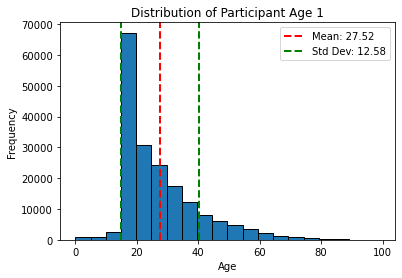

In [31]:
filtered_data = df_incidents_copy['participant_age1']

# Calculate the mean and standard deviation
mean_age = np.mean(filtered_data)
std_dev_age = np.std(filtered_data)

# Create a histogram to visualize the distribution
plt.hist(filtered_data, bins=20, edgecolor='k')  # You can adjust the number of bins as needed
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Participant Age 1')

# Add mean and standard deviation to the plot
plt.axvline(mean_age, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_age:.2f}')
plt.axvline(mean_age + std_dev_age, color='green', linestyle='dashed', linewidth=2, label=f'Std Dev: {std_dev_age:.2f}')
plt.axvline(mean_age - std_dev_age, color='green', linestyle='dashed', linewidth=2)

plt.legend()  # Add a legend to the plot
plt.show()

In [32]:

# removing all values of min_age_participants, max and average greater than 100 or less than 0
df_incidents_copy = df_incidents_copy[(df_incidents_copy['min_age_participants'] > 0) & (df_incidents_copy['min_age_participants'] <= 100)]
df_incidents_copy = df_incidents_copy[(df_incidents_copy['max_age_participants'] > 0) & (df_incidents_copy['max_age_participants'] <= 100)]
df_incidents_copy = df_incidents_copy[(df_incidents_copy['avg_age_participants'] > 0) & (df_incidents_copy['avg_age_participants'] <= 100)]

# Interestingly when you remove some wrong values or outliers you cant get different
# plot of other variables eg: this boxplot show clearly that age is 1e11, but if you remove some outlier then you get anomalous values around 300.


## Mass Shooting 

As we can see sometimes the number of people killed or injured it's not an incident it's a mass shooting

Let's remove this by taking into account this definition, given by FBI:

```
    The Federal Bureau of Investigation (FBI) defines a mass shooting as an incident in which four or more people, not including the shooter, are killed. This definition is often used in the United States.
```

In [33]:

#visualize datapoint with more than 20 killed
df_incidents_copy[df_incidents_copy['n_killed'] > 20]


,date,state,city_or_county,latitude,longitude,congressional_district,participant_age1,participant_age_group1,participant_gender1,min_age_participants,...,n_participants_adult,n_males,n_females,n_killed,n_injured,n_arrested,n_unharmed,n_participants,incident_characteristics1,year
236261,2016-06-12,Florida,Orlando,28.5195,-81.3767,5,34.0,Adult 18+,Male,18,...,103,61.0,17.0,50,53,0.0,0.0,103.0,Shot - Wounded/Injured,2016
152656,2017-11-05,Texas,Sutherland Springs,29.2733,-98.0564,28,14.0,Teen 12-17,Female,1,...,29,19.0,23.0,27,20,0.0,0.0,47.0,Shot - Wounded/Injured,2017


Removing also when `n_participants` is >= 5.
This will change the correlation matrix, try to remove this and see what happens

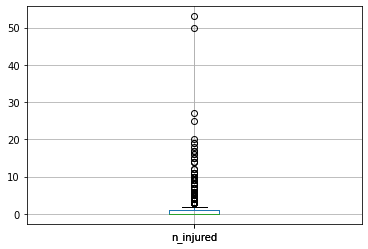

In [34]:
# Let's visualize outliers with a boxplot


df_incidents_copy.boxplot(column='n_killed')
df_incidents_copy.boxplot(column='n_injured')

# Remove outliers if n_killed or n_injured > 4
df_incidents_copy = df_incidents_copy[(df_incidents_copy['n_killed'] < 4) & (df_incidents_copy['n_injured'] < 4)]

# We have to remove when number of participants is more than 5 also
df_incidents_copy = df_incidents_copy[df_incidents_copy['n_participants'] < 5]


## No mass shooting results

<AxesSubplot:>

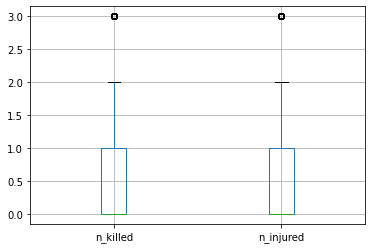

In [35]:
df_incidents_copy.boxplot(column=['n_killed', 'n_injured'])

### Remaining outliers check on the dataset

We will plot all the boxplot relative to the numerical features and check if there are some outliers

' for column in numerical_columns:\n    plt.figure()\n    plt.boxplot(df_incidents_copy[column])\n    plt.title(column)\n    plt.show() '

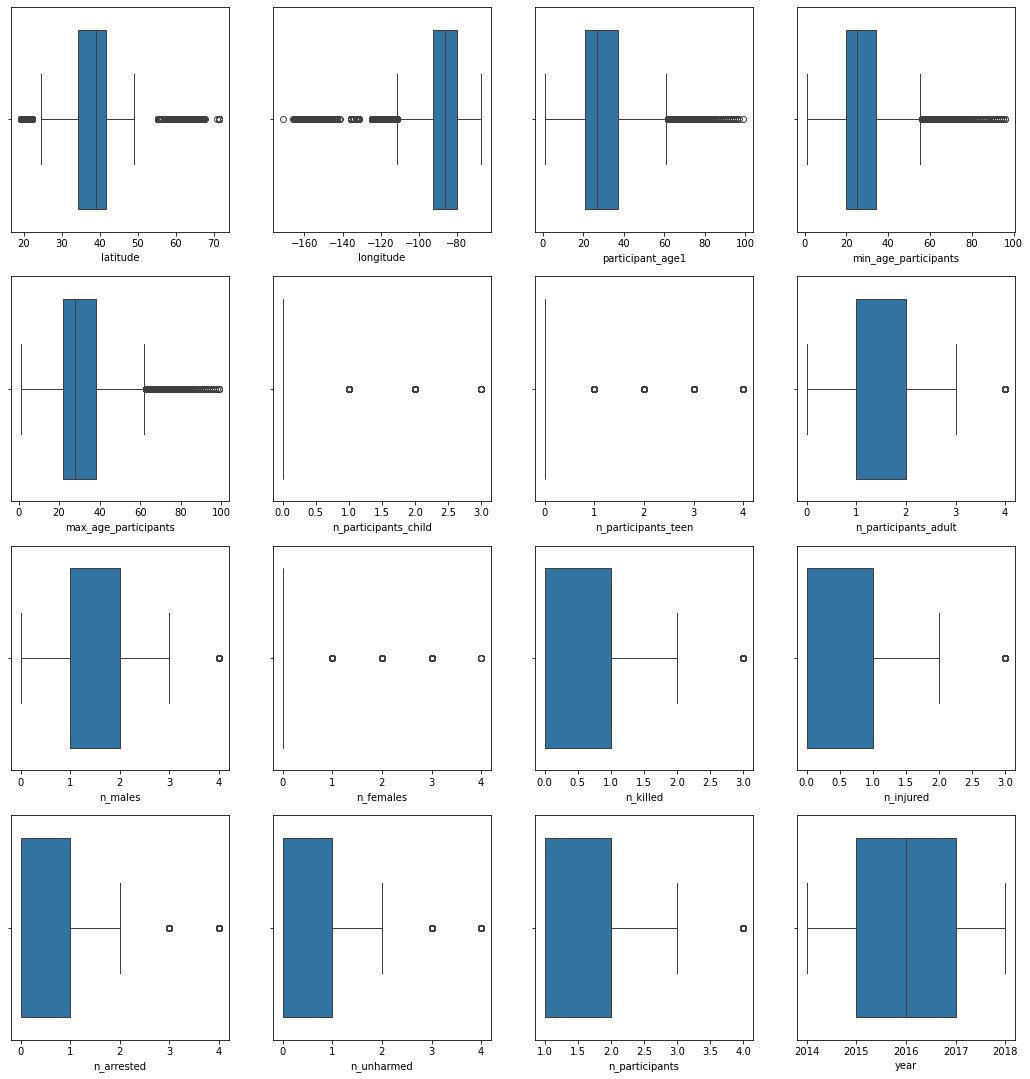

In [38]:
# Plot different subplots of boxplot for each numerical column
import matplotlib.pyplot as plt

# get the numerical columns of the data frame, without taking state senate, congressional district, state house

numerical_columns = df_incidents_copy.select_dtypes(include=['float64', 'int64']).columns.drop(['congressional_district', 'avg_age_participants'])


# gather all in a single plot
boxplot_ax, axes = plt.subplots(nrows=4, ncols=4, figsize=(18, 19))

for i, column in enumerate(numerical_columns):
    sns.boxplot(x=df_incidents_copy[column], ax=axes[i//4, i%4])
    
# create a boxplot for each numerical column
""" for column in numerical_columns:
    plt.figure()
    plt.boxplot(df_incidents_copy[column])
    plt.title(column)
    plt.show() """

## Visualize Distributions 

From the first we can see that plotting distirbution of n_killed against the number of incidents we can see that in the majority of the incidents people do not die. 

We have a distribution skewed to the left so the asimmetry index must be positive.

# Deaths ratio per state

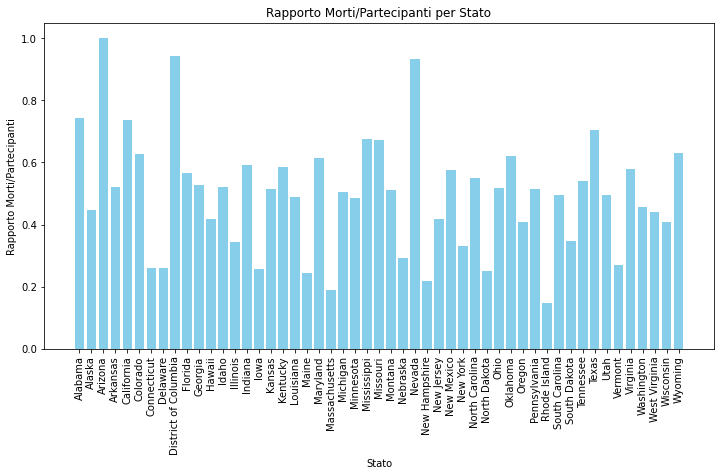

In [40]:
#ratio killed/participants

#gravità media degli incidenti in termini di vittime per partecipante.
# Calcola il numero totale di morti per ogni stato
# Calcola il numero totale di morti per ogni stato
deaths_by_state = df_incidents_copy.groupby('state')['n_killed'].sum()

#numero totale di partecipanti per stato
participants_by_state = df_incidents_copy.groupby('state')['n_participants'].sum()

#rapporto Morti/Partecipanti per stato
mortality_ratio_by_state = deaths_by_state / participants_by_state

#creo un nuovo DataFrame per mostrare i risultati
mortality_ratio_df = pd.DataFrame({
    'Stato': mortality_ratio_by_state.index,
    'Rapporto Morti/Partecipanti': mortality_ratio_by_state.values
})

# normalize the ratio
mortality_ratio_df['Rapporto Morti/Partecipanti'] = mortality_ratio_df['Rapporto Morti/Partecipanti'] / mortality_ratio_df['Rapporto Morti/Partecipanti'].max()

# stampo l'istogramma
plt.figure(figsize=(12, 6))
plt.bar(mortality_ratio_df['Stato'], mortality_ratio_df['Rapporto Morti/Partecipanti'], color='skyblue')
plt.xlabel('Stato')
plt.ylabel('Rapporto Morti/Partecipanti')
plt.title('Rapporto Morti/Partecipanti per Stato')
plt.xticks(rotation=90)  
plt.show()


# 5. Pairwise correlation analysis
Use the correlation coefficients to understand correlation between a set of attributes

## Consideration about correlation

- Spearman vs Pearson : So we usually want to use *Pearson correlation* if we have a sample data large enough so we can leverage the CLT and assume normally distributed data, on the other hand, we can use Spearman if we have a small sample size (small sample implies high variability in data) so in this case we can't assume normality and we can use Spearman correlation to measure the strength and direction of monotonic association between two variables.

What will we use for our correlation analysis of this dataset? 

Well since we have a big sample size, we can use Pearson correlation.

## Visualizing all the distributions 

Now let's visualize all the distribution in a subplot to see how they are distributed

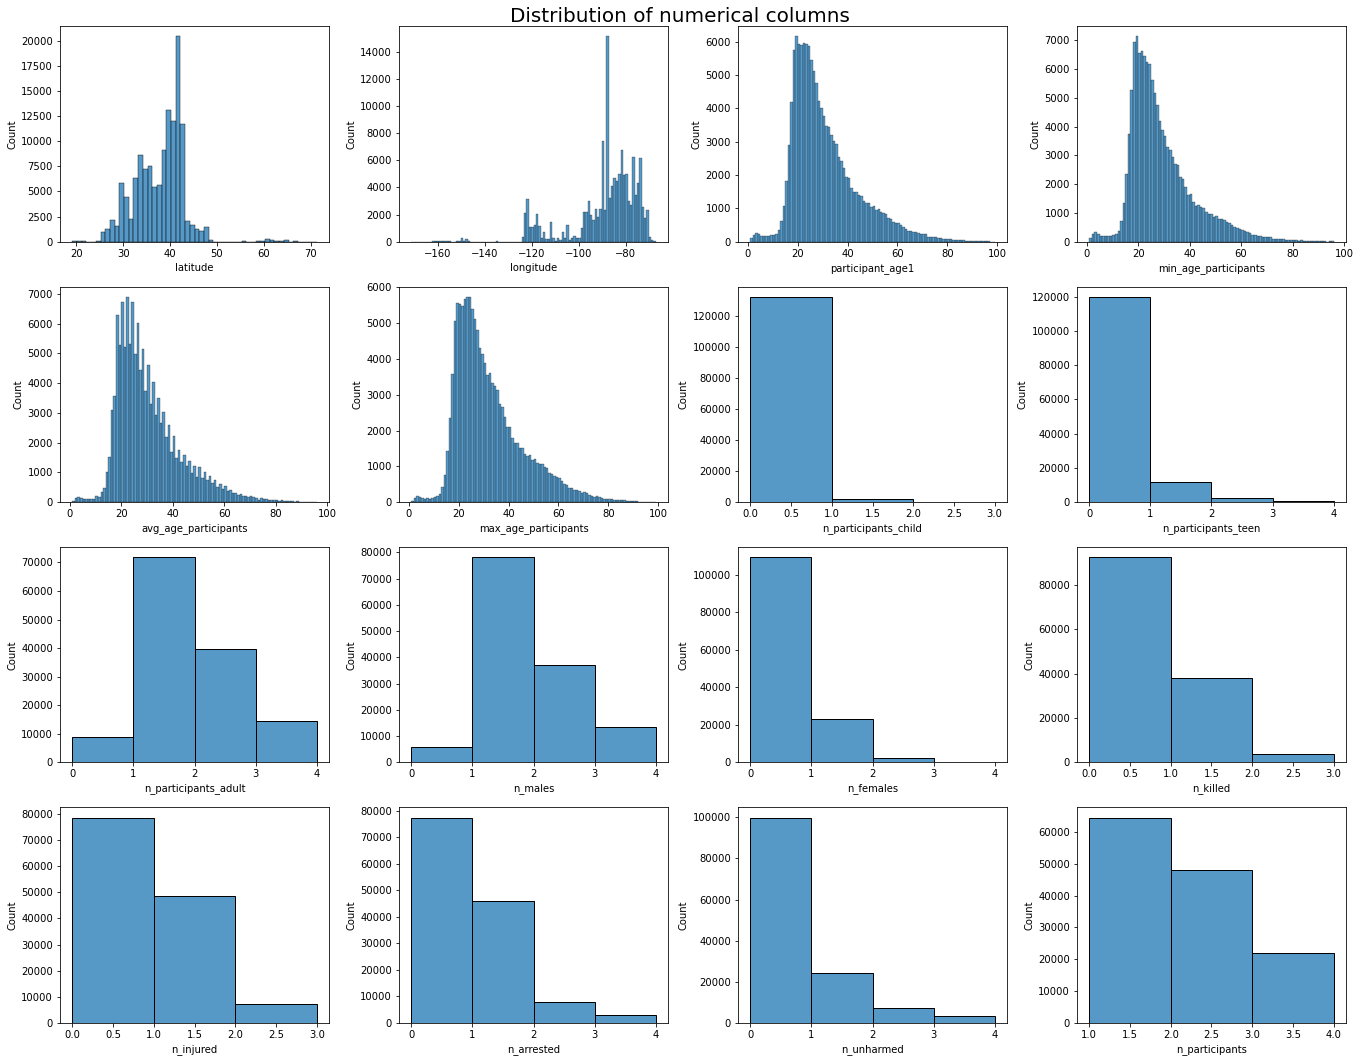

In [42]:
import seaborn as sns
# Subplot of each numerical column distribution

# get the numerical columns of the data frame
numerical_columns = df_incidents_copy.select_dtypes(include=['float64', 'int64']).columns

# create a boxplot for each numerical column
subplot_rows = 4
subplot_cols = 4

fig, axes = plt.subplots(nrows=subplot_rows, ncols=subplot_cols, figsize=(19, 15))
fig.subplots_adjust(hspace=0.5)
fig.suptitle('Distribution of numerical columns', size=20)


# reove columns that are numerical but doens't matter the distribution like state_house_district, state_senate_district.
numerical_columns_distributions = numerical_columns.drop(['congressional_district', 'year'])

for i, column in enumerate(numerical_columns_distributions):
    # understanding how many bins a column should have
    # drop column named low_participants and high_participants
    
        bins_required = df_incidents_copy[column].max() - df_incidents_copy[column].min()
        bins_required = int(bins_required)
        
        # add if gaussian is detected or not near the name of the column
        """ if gaussianity_detect_dict[column]:
            column = column + ' (Gaussian)'
        else:
            column = column + ' (Not Gaussian)'
         """
         
        # Add a title on each subplot
         
        row = i // subplot_cols
        col = i % subplot_cols
        axes[row, col] = sns.histplot(x=df_incidents_copy[column], ax=axes[row, col], bins=bins_required)
        
  
        # add space between subplots
        plt.tight_layout()
        
        #axes[row, col].hist(df_incidents_copy[column])
        #axes[row, col].set_title(column)


<AxesSubplot:>

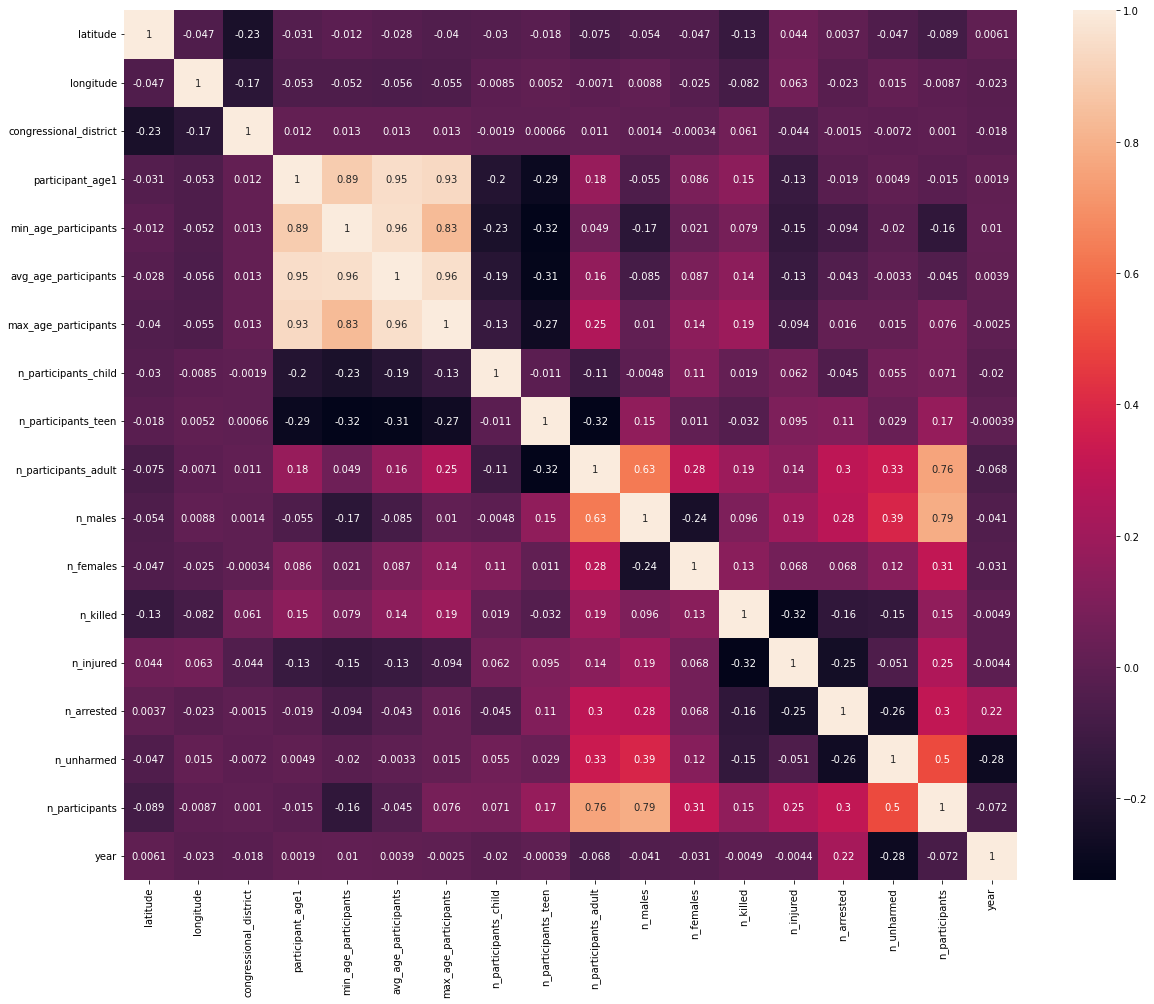

In [43]:
# vector containig all numerical features
numerical_features = df_incidents_copy.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(20, 16))  # Adjust the values (width, height) as needed
correlation_matrix_all = df_incidents_copy[numerical_features].corr()
sns.heatmap(correlation_matrix_all, annot=True)

# As for the correlation n_males & n_participants we can do statistical significance test, in our case the 
# null hypotesis is that the two variables are independent, we can reject the null hypotesis if the p-value is < 0.05

# Contigency table is used for categorical variable, so we can do a thing like this, take intervals 0-1 and 2-3 of participants
# and make this a categorical variable, then we can do a chi-square test

# adding low_participants column and high_participants column
# need to understand if this make sense or it's redundant.

# Maybe remove this because it's useless or part of data preparation
#df_incidents_copy['low_participants'] = df_incidents_copy['n_participants'].apply(lambda x: 1 if x < 2 else 0)
#df_incidents_copy['high_participants'] = df_incidents_copy['n_participants'].apply(lambda x: 1 if x > 1 else 0)

# And now a little visualization of the chi2 test
# Visualize the result of the test
# print max vaues of n_participants


# Consideration on the correlation matrix

- Drop avg and keep max and min age (avg is redundant)
- Drop n_partipcipants_adult (can be reconstructed wit n_participants - teen - child)
- Drop participants_age_1 0.95 correlation with average age, we reconstructed it and it's redundant...
- For congressional district, state house district and state senate district we can remove them from the correlation matrix

We can see that some of the correlation are very high like *max_age_participants*, *min_age_participants* and the *mean_age_participants*.
We could drop max and min since it's a redundancy and the mean represent the average of the two.

- Maybe we can drop *n_participant_adult* with *n_participant* because they are highly correlated 0.76 and *n_males* with *n_participant* 


## More correlation matrix considerations

#### Intresting correlations that can be inferred

-  `n_participants` and `n_males` is higly correlated: 0.79 (This will lower if we filter the `n_participants` > 5, still high tough)

Since n_males is  more correlated with n_participants we can drop it because is rendudaant if it's not males it's female...

- n_adults is the same as before also is highly correlated with n_males: n_participants - n_child - n_teen more or less, so we can drop it 

In [46]:
# Drop columns that are redundant columns after correlation matrix visualization

df_incidents_copy = df_incidents_copy.drop(['avg_age_participants', 'n_participants_adult', 'n_males'], axis=1)

# Map visualization

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

#usa_map = gpd.read_file('../map_data/usa-states-census-2014.shp')

# use entire world map
usa_map = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
# show map



usa_map.plot(figsize=(30,40))

# Draw red point for each latitude and longitude on df_incidents for 50 sampled incidents
sample_incidents = df_incidents_nodup.sample(len(df_incidents_nodup)//100)

for index, row in sample_incidents.iterrows():
    plt.plot(row['longitude'], row['latitude'], 'ro')
    

usa_map.head()


## Visualize out of map (USA) incidents: 


In [ ]:
# More generally

GENERAL = True


def is_outside_usa(latitude, longitude):
    # Bounding box coordinates for the contiguous United States
    min_latitude, max_latitude = 24, 49
    min_longitude, max_longitude = -125, -66

    # Check if the point is outside the bounding box
    return not ((min_latitude <= latitude <= max_latitude) and (min_longitude <= longitude <= max_longitude))

def is_inside_bbox(latitude, longitude, bbox):
    min_lat, max_lat, min_lon, max_lon = bbox
    return min_lat <= latitude <= max_lat and min_lon <= longitude <= max_lon

def is_inside_usa(latitude, longitude):
    usa_bbox = (24.396308, 49.384358, -125.000000, -66.934570)
    alaska_bbox = (51.208344, 71.538800, -179.148909, -129.993926)
    hawaii_bbox = (18.865459, 20.965738, -156.682556, -154.807149)

    return (
        is_inside_bbox(latitude, longitude, usa_bbox) or
        is_inside_bbox(latitude, longitude, alaska_bbox) or
        is_inside_bbox(latitude, longitude, hawaii_bbox)
    )


out_usa = []
out_usa_good = []

for latitude, longitude in zip(df_incidents_nodup['latitude'], df_incidents_nodup['longitude']):
    if is_outside_usa(latitude, longitude):
        out_usa.append((latitude, longitude))
    if not is_inside_usa(latitude, longitude):
        out_usa_good.append((latitude, longitude))
        
usa_map.plot(figsize=(30,40))

if GENERAL:
    for latitude, longitude in out_usa_good:
        plt.plot(longitude, latitude, 'ro')
else:
    for latitude, longitude in out_usa:
        plt.plot(longitude, latitude, 'ro')

# Now looking at China

We need to discard these data

In [ ]:
def is_inside_china(latitude, longitude):
    # Bounding box coordinates for China
    min_latitude, max_latitude = 20, 50
    min_longitude, max_longitude = 80, 130

    # Check if the point is inside the bounding box
    return (min_latitude <= latitude <= max_latitude) and (min_longitude <= longitude <= max_longitude)

bing_chiling = []
# Filter all incidents that are inside China
for latitude, longitude in zip(df_incidents_nodup['latitude'], df_incidents_nodup['longitude']):
    if is_inside_china(latitude, longitude):
        print(latitude, longitude)
        bing_chiling.append((latitude, longitude))

        
# Plot the incidents inside China
usa_map.plot(figsize=(30,40))
# no zoom
plt.xlim(-180, 180)
plt.ylim(-90, 90)

for latitude, longitude in bing_chiling:
    plt.plot(longitude, latitude, 'ro')
    


## Remove China data


In [ ]:
#Remove all the datapoint with the following coordinates:
for latitude, longitude in bing_chiling:
    df_incidents_copy = df_incidents_copy[(df_incidents_copy['latitude'] != latitude) & (df_incidents_copy['longitude'] != longitude)] 

# SAVING DATA CLEANED

## Last check before data save



In [ ]:

pd.set_option('display.max_columns', None)

df_incidents_copy.shape

df_incidents_copy.describe()

df_incidents_copy.head(20)

# Make such that we can see all the columns with head
df_incidents_copy.shape


In [ ]:
file_path = '../source/ds/cleaned_incidents_taskDU.csv'
df_incidents_copy.to_csv(file_path, index=False)

print(f'Data saved to {file_path}')